## Introduction

In [40]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_table("Loan_status_2007-2020Q1.gzip",compression='gzip',sep=',')
data = data.drop(columns=['Unnamed: 0'])
data

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (1,48,58,117,127,128,129,132,133,134,137) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag
0,112134207,20400.0,20400.0,20400.0,60 months,7.97%,413.35,A,A5,asst plant manager,10+ years,MORTGAGE,110000.0,Not Verified,Jun-2017,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,major_purchase,Major purchase,286xx,NC,11.07,0.0,May-1987,780.0,784.0,1.0,40.0,NaN,8.0,0.0,5294.0,8.1%,21.0,w,0.00,0.00,23468.506542,23468.51,20400.00,3068.51,0.0,0.0,0.0,Oct-2019,12330.64,NaN,Nov-2019,739.0,735.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,101473.0,0.0,1.0,0.0,1.0,18.0,44985.0,NaN,0.0,1.0,5133.0,8.0,65500.0,0.0,2.0,1.0,2.0,12684.0,43706.0,10.8,0.0,0.0,144.0,361.0,19.0,18.0,2.0,19.0,40.0,0.0,40.0,0.0,3.0,3.0,4.0,8.0,9.0,6.0,10.0,3.0,8.0,0.0,0.0,0.0,0.0,90.5,0.0,0.0,0.0,187364.0,50279.0,49000.0,56264.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
1,112437968,7000.0,7000.0,7000.0,36 months,7.35%,217.27,A,A4,Managing Director,7 years,OWN,122000.0,Not Verified,Jun-2017,Current,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,300xx,GA,19.22,0.0,Nov-2004,705.0,709.0,1.0,54.0,NaN,8.0,0.0,20055.0,79%,12.0,w,215.96,215.96,7583.010000,7583.01,6784.04,798.97,0.0,0.0,0.0,May-2020,217.27,Jun-2020,May-2020,584.0,580.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,330539.0,0.0,2.0,0.0,1.0,15.0,24316.0,46.0,0.0,0.0,10336.0,57.0,25400.0,0.0,0.0,1.0,1.0,41317.0,1845.0,91.6,0.0,0.0,47.0,151.0,63.0,15.0,1.0,63.0,54.0,3.0,54.0,0.0,3.0,3.0,3.0,5.0,2.0,5.0,9.0,3.0,8.0,0.0,0.0,0.0,0.0,91.7,100.0,0.0,0.0,402189.0,44371.0,21900.0,53148.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
2,112438798,4000.0,4000.0,4000.0,36 months,5.32%,120.46,A,A1,Regional Manager-Customer Success,9 years,MORTGAGE

In [349]:
current = pd.DataFrame(data[data['loan_status'].isin(['Current','Late (31-120 days)','In Grace Period', 
        'Late (16-30 days)', 'Default', 'Issued'])].groupby(['issue_d'])['loan_status'].count())
full = pd.DataFrame(data[data['loan_status'].isin(['Fully Paid','Does not meet the credit policy. Status:Fully Paid'])].groupby(['issue_d'])['loan_status'].count())
default = pd.DataFrame(data[data['loan_status'].isin(['Charged Off','Does not meet the credit policy. Status:Charged Off'])].groupby(['issue_d'])['loan_status'].count())
df = pd.DataFrame(full)
df['default'] = default['loan_status']
df['current'] = current['loan_status'] 
df.fillna(0, inplace = True)
df.columns = ['fully paid', 'current', 'default']
df['default_rate'] = df['default']/(df['default']+df['fully paid'])*100
df['default'] += df['fully paid']
df['current'] += df['default']

df

,fully paid,current,default,default_rate
issue_d,,,,
2007-06-01,21,24.0,24,12.500000
2007-07-01,56,63.0,63,11.111111
2007-08-01,54,74.0,74,27.027027
2007-09-01,40,53.0,53,24.528302
2007-10-01,71,105.0,105,32.380952
2007-11-01,78,112.0,112,30.357143
2007-12-01,125,172.0,172,27.325581
2008-01-01,221,305.0,305,27.540984
2008-02-01,245,306.0,306,19.934641


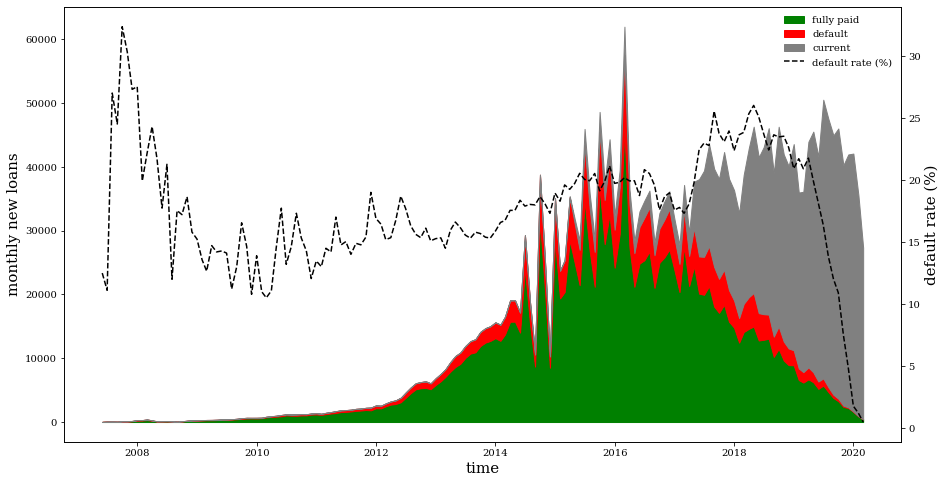

In [453]:
plt.rc('font', family='serif')
fig, ax1 = plt.subplots(figsize=(15,8)) 
line1 =ax1.fill_between(df.index,0, df['fully paid'], label='fully paid', color='green')
line2 =ax1.fill_between(df.index, df['fully paid'],df['default'], label='default', color='red')
line3 =ax1.fill_between(df.index, df['default'],df['current'], label='current',color='gray')
ax1.set_xlabel('time',size=15)
ax1.set_ylabel('monthly new loans', size =15)
ax2 = ax1.twinx()
line4, =ax2.plot(df.index,df['default_rate'],color='black', ls='--',label='default rate (%)')
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
ax2.set_ylabel('default rate (%)', size=15)

plt.legend([line1,line2,line3,line4],["fully paid", "default","current", "default rate (%)"], frameon=False)
plt.savefig('loan_count.png', dpi=300,bbox_inches='tight')

## Data cleaning

## Removing forwardlooking variables and loans not FP or CO

In [3]:
cols_to_drop = ["id", "funded_amnt", "funded_amnt_inv", "emp_title", "pymnt_plan", 
                "url", "title", "initial_list_status", "out_prncp",
                "out_prncp_inv", "total_pymnt", "total_pymnt_inv", "last_pymnt_d", "last_pymnt_amnt", 
                "next_pymnt_d", "last_credit_pull_d", "last_fico_range_high", "last_fico_range_low", 
                "policy_code", "hardship_flag", "hardship_type", "hardship_reason", "hardship_status", 
                "deferral_term", "hardship_amount", "hardship_start_date", "hardship_end_date", 
                "payment_plan_start_date", "hardship_length", "hardship_dpd", "hardship_loan_status",
                "orig_projected_additional_accrued_interest", "hardship_payoff_balance_amount",
                "hardship_last_payment_amount", "debt_settlement_flag", "total_rec_prncp", 
                "total_rec_int", "total_rec_late_fee", "recoveries", "collection_recovery_fee"]

loans = data.drop(columns=cols_to_drop)

In [4]:
loans = loans[loans['loan_status'].isin(['Fully Paid','Charged Off'])]
loans.groupby("loan_status")["loan_status"].count()

loan_status
Charged Off     362534
Fully Paid     1496490
Name: loan_status, dtype: int64

# Variable analysis

# Create inverse of months variables and make issue_d datetime

In [5]:
new_metric_cols = ["open_acc_6m", "open_act_il", "open_il_12m", "open_il_24m", "mths_since_rcnt_il", "total_bal_il", "il_util", "open_rv_12m", "open_rv_24m", "max_bal_bc", "all_util", "inq_fi", "total_cu_tl", "inq_last_12m"]
loans["issue_d"] = loans["issue_d"].astype("datetime64[ns]")
mths_since_last_cols = [
    col_name
    for col_name in loans.columns
    if "mths_since" in col_name or "mo_sin_rcnt" in col_name
]
mths_since_old_cols = [
    col_name for col_name in loans.columns if "mo_sin_old" in col_name
]

for col_name in mths_since_last_cols:
    loans[col_name] = [
        0.0 if pd.isna(months) else 1 / 1 if months == 0 else 1 / months
        for months in loans[col_name]
    ]
loans.loc[:, mths_since_old_cols].fillna(0, inplace=True)

# Rename inverse columns
rename_mapper = {}
for col_name in mths_since_last_cols:
    rename_mapper[col_name] = col_name.replace("mths_since", "inv_mths_since").replace(
        "mo_sin_rcnt", "inv_mo_sin_rcnt"
    )
loans.rename(columns=rename_mapper, inplace=True)


def replace_list_value(l, old_value, new_value):
    i = l.index(old_value)
    l.pop(i)
    l.insert(i, new_value)


replace_list_value(new_metric_cols, "mths_since_rcnt_il", "inv_mths_since_rcnt_il")

# Convert earliest_cr_line to months

In [6]:
def get_credit_history_age(col_name):
    earliest_cr_line_date = loans[col_name].astype("datetime64[ns]")
    cr_hist_age_delta = loans["issue_d"] - earliest_cr_line_date
    MINUTES_PER_MONTH = int(365.25 / 12 * 24 * 60)
    cr_hist_age_months = cr_hist_age_delta / np.timedelta64(MINUTES_PER_MONTH, "m")
    return cr_hist_age_months.map(
        lambda value: np.nan if pd.isna(value) else round(value)
    )
cr_hist_age_months = get_credit_history_age("earliest_cr_line")
loans["earliest_cr_line"] = cr_hist_age_months
loans.rename(
    columns={
        "earliest_cr_line": "cr_hist_age_mths"
    },
    inplace=True)

In [7]:
#Missing values
def null_values(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns
null_values(loans).to_excel('missing_values.xlsx')

Dataframe has 101 columns.
There are 67 columns that have missing values.


# Fill joint columns in individual applications

In [8]:
for joint_col, indiv_col in zip(
    ["annual_inc_joint", "dti_joint", "verification_status_joint"],
    ["annual_inc", "dti", "verification_status"],
):
    loans[joint_col] = [
        joint_val if app_type == "Joint App" else indiv_val
        for app_type, joint_val, indiv_val in zip(
            loans["application_type"], loans[joint_col], loans[indiv_col]
        )
    ]

In [9]:
#check percentage the same
for joint_col, indiv_col in zip(
    ["annual_inc_joint", "dti_joint", "verification_status_joint"],
    ["annual_inc", "dti", "verification_status"]):
    print(np.mean(loans[joint_col]==loans[indiv_col]))
#very high delete single values

0.9630542693370284
0.9627654080851027
0.9905896857705979


In [10]:
#remove new variables with lots of missing data
joint_new_metric_cols = ["revol_bal_joint", "sec_app_fico_range_low", "sec_app_fico_range_high", "sec_app_earliest_cr_line", "sec_app_inq_last_6mths", "sec_app_mort_acc", "sec_app_open_acc", "sec_app_revol_util", "sec_app_open_act_il", "sec_app_num_rev_accts", "sec_app_chargeoff_within_12_mths", "sec_app_collections_12_mths_ex_med"]
single_cols_replaced_by_joint= ["annual_inc", "dti", "verification_status"]
new_metrics_del = new_metric_cols + joint_new_metric_cols + single_cols_replaced_by_joint
loans.drop(columns=new_metrics_del, inplace=True)

## Categorical features.

In [11]:
#replace low frequency purpose values with 'other' to reduce number of variables
loans['purpose'] = loans['purpose'].replace(['wedding','renewable_energy','educational'], 'other')
loan_status_to_int = {'Fully Paid': 0,'Charged Off': 1}
term_to_int = {' 36 months': 0,' 60 months': 1}
grade_to_int = dict(zip(['A', 'B', 'C', 'D', 'E', 'F', 'G'], np.arange(7, 0, -1)))
#copied from above, write a function to generate this dict
sub_grade_sorted = {'G5': 0, 'G4': 1, 'G3': 2, 'G2': 3, 'G1': 4,
                    'F5': 5, 'F4': 6, 'F3': 7, 'F2': 8, 'F1': 9,
                    'E5': 10, 'E4': 11, 'E3': 12, 'E2': 13, 'E1': 14,
                    'D5': 15, 'D4': 16, 'D3': 17, 'D2': 18, 'D1': 19,
                    'C5': 20, 'C4': 21, 'C3': 22, 'C2': 23, 'C1': 24,
                    'B5': 25, 'B4': 26, 'B3': 27, 'B2': 28, 'B1': 29,
                    'A5': 30, 'A4': 31, 'A3': 32, 'A2': 33, 'A1': 34}    
home_to_int = {'MORTGAGE': 2, 'RENT': 1, 'OWN': 3,'ANY': 0,'OTHER': 0, 'NONE':0 }
ver_stat_to_int = {'Source Verified':2,'Verified': 1,'Not Verified': 0} 
emp_length_to_int = {'10+ years':10, '6 years':6, '4 years':4, '< 1 year':0.5, '2 years':2,
                   '9 years':9, '5 years':5, '3 years':3, '7 years':7, '1 year':1,'8 years':8}
#replacements
loans.replace({'loan_status': loan_status_to_int,'term': term_to_int, 'grade':grade_to_int,'sub_grade': sub_grade_sorted,
               'home_ownership':home_to_int,'verification_status_joint':ver_stat_to_int, 'emp_length':emp_length_to_int}, inplace=True)

#dummies for purpose and loan status
loans = loans.join(pd.get_dummies(loans[['purpose','application_type']]))
loans.drop(columns=['purpose','application_type'], inplace=True)

# Scale extreme variables

In [12]:
loans.dropna(axis="index", subset=['zip_code'], inplace=True)
#taking log values of $ amounts
loans['annual_inc_joint']+=1
loans['annual_inc_joint']=np.log(loans['annual_inc_joint'])
loans['tot_coll_amt']+=1
loans['tot_coll_amt']=np.log(loans['tot_coll_amt'])
loans['revol_bal']+=1
loans['revol_bal']=np.log(loans['revol_bal'])
loans['tot_coll_amt']+=1
loans['tot_coll_amt']=np.log(loans['tot_coll_amt'])
loans['tot_cur_bal']+=1
loans['tot_cur_bal']=np.log(loans['tot_cur_bal'])
loans['total_rev_hi_lim']+=1
loans['total_rev_hi_lim']=np.log(loans['total_rev_hi_lim'])
loans['total_il_high_credit_limit']+=1
loans['total_il_high_credit_limit']=np.log(loans['total_il_high_credit_limit'])
loans['total_bc_limit']+=1
loans['total_bc_limit']=np.log(loans['total_bc_limit'])
loans['total_bal_ex_mort']+=1
loans['total_bal_ex_mort']=np.log(loans['total_bal_ex_mort'])
loans['tot_hi_cred_lim']+=1
loans['tot_hi_cred_lim']=np.log(loans['tot_hi_cred_lim'])
loans['delinq_amnt']+=1
loans['delinq_amnt']=np.log(loans['delinq_amnt'])
loans['avg_cur_bal']+=1
loans['avg_cur_bal']=np.log(loans['avg_cur_bal'])
loans['bc_open_to_buy']+=1
loans['bc_open_to_buy']=np.log(loans['bc_open_to_buy'])

#removing % or xx from values
loans['int_rate'] = loans['int_rate'].str.rstrip().str.rstrip('%').astype('float')/100
loans['revol_util'] = loans['revol_util'].str.rstrip().str.rstrip('%').astype('float')/100
loans['year'] = loans['issue_d'].dt.year
loans['zip_code'] = loans['zip_code'].str[:-2].astype('int')
loans['fico_avg_score'] = (loans['fico_range_high']+loans['fico_range_low'] )/2
loans.drop(columns=['fico_range_high','fico_range_low'], inplace=True)

# Missing values

In [13]:
#no observations before 2012 for these variables
loans.dropna(axis="index", subset=['num_bc_tl'], inplace=True)
#assume no work if missing
loans['emp_length'].fillna(.5,inplace= True)
#delete loan applications with 3 or more missing values
loans = loans[loans.isnull().sum(axis=1)<3]

In [14]:
for col in ['num_tl_120dpd_2m','mo_sin_old_il_acct','inq_last_6mths','revol_util','dti_joint',
            'verification_status_joint','bc_util','num_rev_accts','pct_tl_nvr_dlq','percent_bc_gt_75']:
    loans[col] = loans[col].transform(lambda x: x.fillna(x.median()))


In [15]:
for col in loans.columns:
    print(loans[col].isnull().sum(),col)

0 loan_amnt
0 term
0 int_rate
0 installment
0 grade
0 sub_grade
0 emp_length
0 home_ownership
0 issue_d
0 loan_status
0 zip_code
0 addr_state
0 delinq_2yrs
0 cr_hist_age_mths
0 inq_last_6mths
0 inv_mths_since_last_delinq
0 inv_mths_since_last_record
0 open_acc
0 pub_rec
0 revol_bal
0 revol_util
0 total_acc
0 collections_12_mths_ex_med
0 inv_mths_since_last_major_derog
0 annual_inc_joint
0 dti_joint
0 verification_status_joint
0 acc_now_delinq
0 tot_coll_amt
0 tot_cur_bal
0 total_rev_hi_lim
0 acc_open_past_24mths
0 avg_cur_bal
0 bc_open_to_buy
0 bc_util
0 chargeoff_within_12_mths
0 delinq_amnt
0 mo_sin_old_il_acct
0 mo_sin_old_rev_tl_op
0 inv_mo_sin_rcnt_rev_tl_op
0 inv_mo_sin_rcnt_tl
0 mort_acc
0 inv_mths_since_recent_bc
0 inv_mths_since_recent_bc_dlq
0 inv_mths_since_recent_inq
0 inv_mths_since_recent_revol_delinq
0 num_accts_ever_120_pd
0 num_actv_bc_tl
0 num_actv_rev_tl
0 num_bc_sats
0 num_bc_tl
0 num_il_tl
0 num_op_rev_tl
0 num_rev_accts
0 num_rev_tl_bal_gt_0
0 num_sats
0 num_tl_12

# Adding Macro variables

Country level

In [18]:
country_macro = pd.read_excel('All country level macro variables.xlsx')
country_macro.columns = ['Date', 'month+1', '3-year-%', '5-year-%',
       'CCI (Consumer Confidence Index)', 'Inflation', 'Russel2000', 'VIX',
       'Policy Uncertainty Index',
       'S&P500']

zip_code level

In [19]:
gdp_growth = pd.read_excel('Data/Final data/Zipleveldata.xlsx', sheet_name='GDP growth zip', index_col='zip-3')
ziplevelmacro = pd.DataFrame(gdp_growth.stack(level=0), columns=['GDP growth']).rename_axis(index=['zip_code', 'year'])

gdp_index = pd.read_excel('Data/Final data/Zipleveldata.xlsx', sheet_name='GDP index 2001', index_col='zip-3')
gdp_index_01 = pd.DataFrame(gdp_index.stack(level=0)).rename_axis(index=['zip-3', 'year'])
ziplevelmacro.loc[:,'GDP index'] = gdp_index_01

income_pp = pd.read_excel('Data/Final data/Zipleveldata.xlsx', sheet_name='Income pp', index_col='zip-3')
income_pp_zip = pd.DataFrame(income_pp.stack(level=0)).rename_axis(index=['zip-3', 'year'])
ziplevelmacro.loc[:,'Income'] = income_pp_zip

income_change = pd.read_excel('Data/Final data/Zipleveldata.xlsx', sheet_name='Income pp change', index_col='zip-3')
income_change_zip = pd.DataFrame(income_change.stack(level=0)).rename_axis(index=['zip-3', 'year'])
ziplevelmacro.loc[:,'Income change'] = income_change_zip

unemployment_rate = pd.read_excel('Data/Final data/Zipleveldata.xlsx', sheet_name='Unemployment rate', index_col='zip-3')
unemployment = pd.DataFrame(unemployment_rate.stack(level=0)).rename_axis(index=['zip-3', 'year'])
ziplevelmacro.loc[:,'Unemployment rate'] = unemployment

unemployment_change = pd.read_excel('Data/Final data/Zipleveldata.xlsx', sheet_name='Unemployment change', index_col='zip-3')
unemployment_changes = pd.DataFrame(unemployment_change.stack(level=0)).rename_axis(index=['zip-3', 'year'])
ziplevelmacro.loc[:,'Unemployment change'] = unemployment_changes

house_prices = pd.read_excel('Data/Final data/Zipleveldata.xlsx', sheet_name='House prices').set_index(['ZIP code', 'Year'])
ziplevelmacro.loc[:,'House price change'] = house_prices['Annual Change (%)']
ziplevelmacro.loc[:,'House price index'] = house_prices['HPI with 2000 base']

ziplevelmacro = ziplevelmacro.reset_index()
ziplevelmacro['year+1'] = ziplevelmacro['year']+1
ziplevelmacro = ziplevelmacro.replace('.',np.nan)
ziplevelmacro['House price index'] = ziplevelmacro['House price index'].astype('float')
ziplevelmacro['House price change'] = ziplevelmacro['House price change'].astype('float')
ziplevelmacro

,zip_code,year,GDP growth,GDP index,Income,Income change,Unemployment rate,Unemployment change,House price change,House price index,year+1
0,10,2006,0.018911,107.965489,36685.000000,0.046666,4.840000,0.021097,4.72,165.95,2007
1,10,2007,0.003728,108.394014,38305.600000,0.044176,4.700000,-0.028926,0.52,166.82,2008
2,10,2008,0.003882,108.861647,39865.000000,0.040709,5.540000,0.178723,-3.04,161.75,2009
3,10,2009,-0.019300,106.754118,39709.000000,-0.003913,7.980000,0.440433,-4.33,154.74,2010
4,10,2010,0.023430,109.236689,40851.800000,0.028779,8.500000,0.065163,-2.12,151.45,2011
...,...,...,...,...,...,...,...,...,...,...,...
11552,999,2014,0.000138,117.303926,49302.000000,0.061232,9.900000,0.060714,4.55,159.10,2015
11553,999,2015,0.052046,117.622755,50887.333333,0.032156,9.133333,-0.077441,5.12,167.25,2016
11554,999,2016,0.016405,114.624331,49673.000000,-0.023863,8.733333,-0.043796,0.09,167.41,2017
11555,999,2017,-0.039432,113.706057,50532.666667,0.017307,8.233333,-0.057252,1.45,169.84,2018


In [20]:
final_loans = pd.merge(loans, ziplevelmacro, left_on=['year','zip_code'], right_on=['year+1','zip_code'], how='left')
final_loans = pd.merge(final_loans, country_macro, left_on='issue_d',right_on='month+1', how='left')
final_loans.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1771316 entries, 0 to 1771315
Data columns (total 103 columns):
loan_amnt                             1771316 non-null float64
term                                  1771316 non-null int64
int_rate                              1771316 non-null float64
installment                           1771316 non-null float64
grade                                 1771316 non-null int64
sub_grade                             1771316 non-null int64
emp_length                            1771316 non-null float64
home_ownership                        1771316 non-null int64
issue_d                               1771316 non-null datetime64[ns]
loan_status                           1771316 non-null int64
zip_code                              1771316 non-null int64
addr_state                            1771316 non-null object
delinq_2yrs                           1771316 non-null float64
cr_hist_age_mths                      1771316 non-null int64
inq_last_6mt

In [21]:
final_loans.loc[final_loans['term'] == 1,'risk_premium'] = final_loans.loc[final_loans['term'] == 1,'int_rate'] - final_loans.loc[final_loans['term'] == 1,'5-year-%']/100
final_loans.loc[final_loans['term'] == 0,'risk_premium'] = final_loans.loc[final_loans['term'] == 0,'int_rate'] - final_loans.loc[final_loans['term'] == 0,'3-year-%']/100
for col in ['House price index','House price change','GDP growth','Unemployment change',
            'Unemployment rate','Income change','Income','GDP index']:
    final_loans[col] = final_loans.groupby(['addr_state','year_x'])[col].transform(lambda x: x.fillna(x.mean()))
final_loans= final_loans[final_loans['year_x']!=2020]

In [109]:
final_loans.loc[:,['GDP growth', 'GDP index', 'Income', 'Income change','risk_premium',
     'Unemployment rate', 'Unemployment change', 'House price change','House price index',
     'CCI (Consumer Confidence Index)', 'Inflation','Russel2000', 'VIX', 'Policy Uncertainty Index', 'S&P500']].describe().T

,count,mean,std,min,25%,50%,75%,max
GDP growth,1768387.0,0.021431,0.029242,-0.267819,0.007324,0.021137,0.034899,0.560790
GDP index,1768387.0,132.892511,35.709418,32.101109,116.913908,127.599776,139.730921,1054.283529
Income,1768387.0,48678.144894,15551.834327,24127.600000,39487.954545,45589.000000,53866.500000,251728.000000
Income change,1768387.0,0.034217,0.025489,-0.223496,0.021474,0.036195,0.049684,0.389882
risk_premium,1768387.0,0.118212,0.048188,0.025200,0.082300,0.113500,0.145800,0.301100
Unemployment rate,1768387.0,5.998068,1.905449,1.400000,4.611111,5.666667,7.000000,18.333333
Unemployment change,1768387.0,-0.116793,0.069248,-0.388889,-0.164179,-0.123810,-0.079727,0.611940
House price change,1768387.0,4.946545,4.454724,-20.990000,1.950000,4.320000,7.730000,27.130000
House price index,1768387.0,149.793820,34.799287,61.960000,125.610000,143.780000,168.349528,393.320000
CCI (Consumer Confidence Index),1768387.0,100.576513,0.768337,98.396760,100.394700,100.708800,101.183600,101.616500


# Train val test split

In [22]:
X_var = ['loan_amnt', 'term', 'installment', 'grade', 'sub_grade','emp_length', 'home_ownership', 
     'delinq_2yrs','cr_hist_age_mths', 'inq_last_6mths', 
     'inv_mths_since_last_delinq','inv_mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal','revol_util', 
     'total_acc', 'collections_12_mths_ex_med','inv_mths_since_last_major_derog',
     'annual_inc_joint', 'dti_joint', 'verification_status_joint','acc_now_delinq', 'tot_coll_amt', 
     'tot_cur_bal', 'total_rev_hi_lim','acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
     'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct','mo_sin_old_rev_tl_op', 
     'inv_mo_sin_rcnt_rev_tl_op','inv_mo_sin_rcnt_tl', 'mort_acc', 'inv_mths_since_recent_bc',
     'inv_mths_since_recent_bc_dlq', 'inv_mths_since_recent_inq','inv_mths_since_recent_revol_delinq', 
     'num_accts_ever_120_pd','num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl',
     'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0','num_sats', 'num_tl_120dpd_2m', 
     'num_tl_30dpd', 'num_tl_90g_dpd_24m','num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75',
     'pub_rec_bankruptcies', 'tax_liens', 'tot_hi_cred_lim','total_bal_ex_mort', 'total_bc_limit', 
     'total_il_high_credit_limit','fico_avg_score', 'purpose_car', 'purpose_credit_card',
     'purpose_debt_consolidation', 'purpose_home_improvement','purpose_house', 'purpose_major_purchase', 
     'purpose_medical','purpose_moving', 'purpose_other', 'purpose_small_business',
     'purpose_vacation','application_type_Individual','application_type_Joint App',
     'GDP growth', 'GDP index', 'Income', 'Income change','risk_premium',
     'Unemployment rate', 'Unemployment change', 'House price change','House price index',
     'CCI (Consumer Confidence Index)', 'Inflation','Russel2000', 'VIX', 'Policy Uncertainty Index', 'S&P500']
y_var = ['loan_status']
all_var = X_var+y_var

In [23]:
X_var_renamed = ['loan_amnt', 'term', 'installment', 'grade', 'sub_grade','emp_length', 'home_ownership', 
     'delinq_2yrs','cr_hist_age_mths', 'inq_last_6mths', 
     'inv_mths_since_last_delinq','inv_mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal','revol_util', 
     'total_acc', 'collections_12_mths_ex_med','inv_mths_since_last_major_derog',
     'annual_inc', 'dti', 'verification_status','acc_now_delinq', 'tot_coll_amt', 
     'tot_cur_bal', 'total_rev_hi_lim','acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
     'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct','mo_sin_old_rev_tl_op', 
     'inv_mo_sin_rcnt_rev_tl_op','inv_mo_sin_rcnt_tl', 'mort_acc', 'inv_mths_since_recent_bc',
     'inv_mths_since_recent_bc_dlq', 'inv_mths_since_recent_inq','inv_mths_since_recent_revol_delinq', 
     'num_accts_ever_120_pd','num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl',
     'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0','num_sats', 'num_tl_120dpd_2m', 
     'num_tl_30dpd', 'num_tl_90g_dpd_24m','num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75',
     'pub_rec_bankruptcies', 'tax_liens', 'tot_hi_cred_lim','total_bal_ex_mort', 'total_bc_limit', 
     'total_il_high_credit_limit','fico_avg_score', 'purpose_car', 'purpose_credit_card',
     'purpose_debt_consolidation', 'purpose_home_improvement','purpose_house', 'purpose_major_purchase', 
     'purpose_medical','purpose_moving', 'purpose_other', 'purpose_small_business',
     'purpose_vacation','application_type_individual','application_type_joint_app',
     'GDP_growth', 'GDP_index', 'avg_income_zip', 'avg_income_change_zip','risk_premium',
     'unemployment_rate', 'unemployment_change', 'house_price_change','house_price_index',
     'consumer_confidence_index', 'inflation','russel2000', 'VIX', 'policy_uncertainty_index', 'S&P500']

In [42]:
X.columns = X_var_renamed

In [25]:
from sklearn.model_selection import train_test_split
X = final_loans[X_var]
y = final_loans[y_var]

X_train, X_valtest, y_train, y_valtest = train_test_split(X,y,test_size=.2,random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_valtest,y_valtest,test_size=.5,random_state=42)

# Save memory

In [26]:
del(data)
del(loans)

# Resampling method

In [27]:
import scipy
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

In [148]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

In [69]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

In [77]:
from imblearn.under_sampling import InstanceHardnessThreshold
iht = InstanceHardnessThreshold(random_state=42,cv=2)
X_train_iht, y_train_iht = iht.fit_resample(X_train, y_train)
print(y_train_iht.iloc[:,0].value_counts())
y_train.iloc[:,0].value_counts()

0    298027
1    278405
Name: loan_status, dtype: int64


0    1136304
1     278405
Name: loan_status, dtype: int64

# Scaling

In [28]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
ss = StandardScaler()
X_train_scaled_rus = ss.fit_transform(X_train_rus)
X_val_scaled_rus = ss.transform(X_val)
X_test_scaled_rus = ss.transform(X_test)
del(X_train_rus)

In [149]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
ss = StandardScaler()
X_train_scaled_ros = ss.fit_transform(X_train_ros)
X_val_scaled_ros = ss.transform(X_val)
X_test_scaled_ros = ss.transform(X_test)
del(X_train_ros)

In [70]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
ss = StandardScaler()
X_train_scaled_smote = ss.fit_transform(X_train_smote)
X_val_scaled_smote = ss.transform(X_val)
X_test_scaled_smote = ss.transform(X_test)
del(X_train_smote)

In [78]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
ss = StandardScaler()
X_train_scaled_iht = ss.fit_transform(X_train_iht)
X_val_scaled_iht = ss.transform(X_val)
X_test_scaled_iht = ss.transform(X_test)
del(X_train_iht)

# Correlation map

In [43]:
corr = pd.DataFrame(np.concatenate((X_train_scaled_rus,y_train_rus),axis=1),columns=X_var_renamed+y_var).corr()


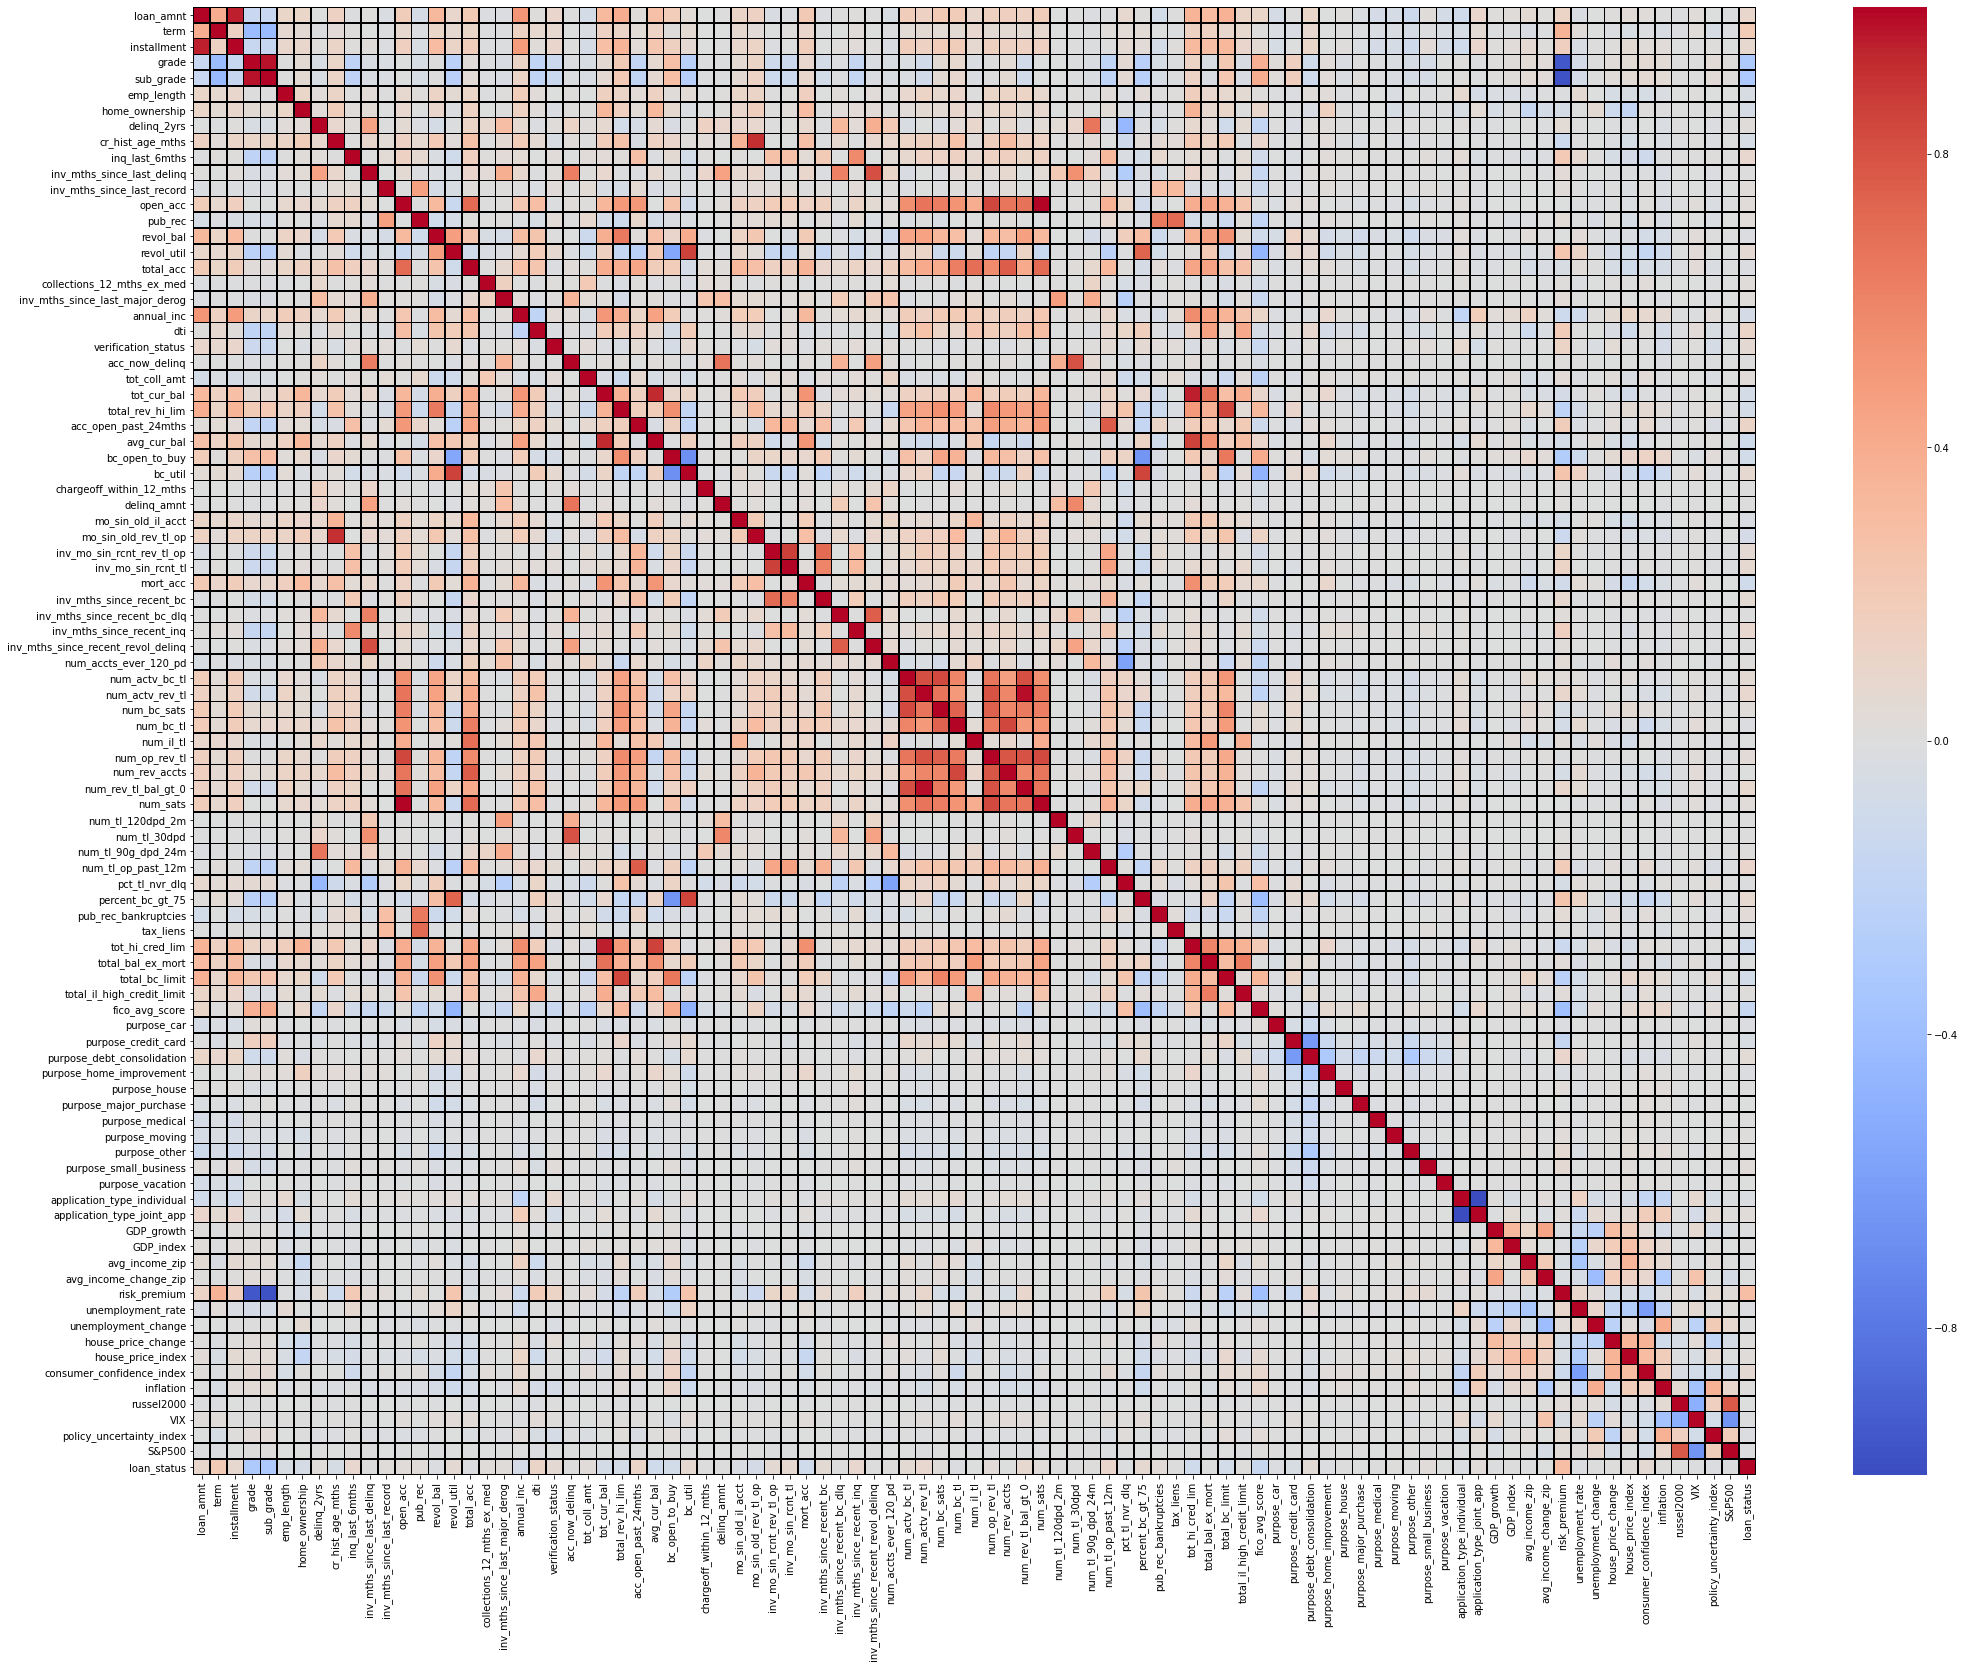

In [46]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(35,27)) 
sns.heatmap(corr, annot = False,cmap= 'coolwarm',ax=ax,fmt='.1g',vmin=-1,vmax=1,linewidths=.5, linecolor='black')
plt.savefig('correlation matrix.png', bbox_inches = "tight",dpi=300)

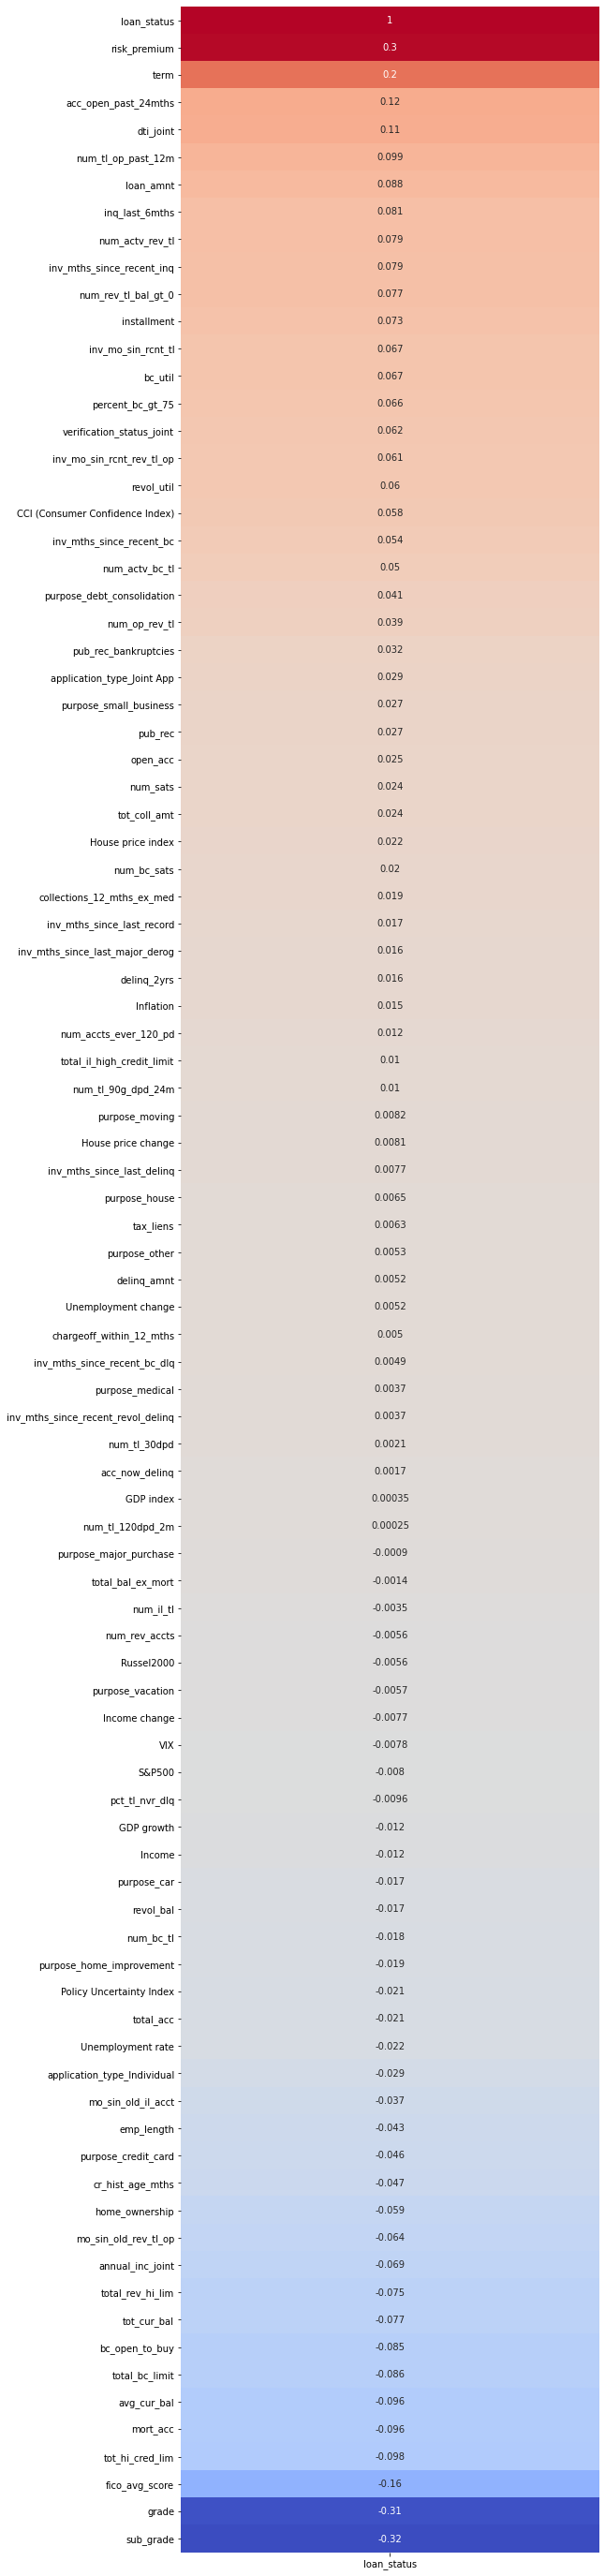

In [329]:
fig, ax = plt.subplots(figsize=(8,50)) 
sns.heatmap(corr[['loan_status']].sort_values(by='loan_status', ascending=False), annot=True, cbar=False,cmap='coolwarm',ax=ax,vmax=.3)

In [317]:
import statsmodels.api as sm 
log_reg = sm.Logit(y_train_rus,X_train_scaled_rus).fit(method='lbfgs')


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [318]:
print(log_reg.summary(xname=X_var))

                           Logit Regression Results                           
Dep. Variable:            loan_status   No. Observations:               556810
Model:                          Logit   Df Residuals:                   556720
Method:                           MLE   Df Model:                           89
Date:                Sun, 08 Nov 2020   Pseudo R-squ.:                  0.1110
Time:                        15:21:33   Log-Likelihood:            -3.4312e+05
converged:                      False   LL-Null:                   -3.8595e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
loan_amnt                              0.0844      0.021      4.021      0.000       0.043       0.126
term                                   0.3116      0.007   

# Neural Networks

In [27]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.wrappers.scikit_learn import KerasClassifier
METRICS = [keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
]

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Using TensorFlow backend.


In [28]:
X = final_loans[X_var]
y = final_loans[y_var]

# 10-fold cross validation best model

In [31]:
from sklearn.model_selection import StratifiedKFold
import numpy
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# define 10-fold cross validation test harness
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
cvscores1 = []
for train, test in kfold.split(X, y):
  # create model
    ros = RandomOverSampler(random_state=42)
    X_train_ros, y_train_ros = ros.fit_resample(X.iloc[train,:], y.iloc[train,:])
    ss = StandardScaler()
    X_train_scaled_ros = ss.fit_transform(X_train_ros)
    X_test_scaled_ros = ss.transform(X.iloc[test,:])
    model_ros = Sequential()
    model_ros.add(Dense(128, input_dim=X_train_scaled_ros.shape[1],activation='relu'))
    model_ros.add(Dropout(0.1))
    model_ros.add(Dense(64, activation='relu'))
    model_ros.add(Dropout(0.1))
    model_ros.add(Dense(32, activation='relu'))
    model_ros.add(Dropout(0.1))
    model_ros.add(Dense(16, activation='relu'))
    model_ros.add(Dense(1, activation='sigmoid'))
    model_ros.compile(loss='binary_crossentropy', optimizer='adam', metrics=METRICS)
    #earlyStopping = EarlyStopping(monitor='val_acc', patience=7, verbose= 0, mode= 'max', restore_best_weights=False)
    reduce_lr_loss = ReduceLROnPlateau(monitor='loss', factor = 0.1, patience = 2, verbose=1, mode='max')
    model_ros.fit(X_train_scaled_ros, y_train_ros, epochs=4, batch_size=128,callbacks=[reduce_lr_loss], verbose=1)

    # evaluate the model
    yhat_probs_nn_ros = model_ros.predict(X_test_scaled_ros, verbose=0)
    yhat_classes_nn_ros = model_ros.predict_classes(X_test_scaled_ros, verbose=0)
    scores = results(y.iloc[test,:],yhat_classes_nn_ros,yhat_probs_nn_ros)[4]
    
    print("%s: %.2f%%" % (model_ros.metrics_names[1], scores*100))
    cvscores1.append(scores * 100)
print("%.2f%% (+/- %.2f%%)" % (numpy.mean(cvscores1), numpy.std(cvscores1)))


Train on 2556528 samples
Epoch 1/4
2556528/2556528 [==============================] - 97s 38us/sample - loss: 0.6117 - accuracy: 0.6628 - precision: 0.6592 - recall: 0.6741 - auc: 0.7238
Epoch 2/4
2556528/2556528 [==============================] - 93s 36us/sample - loss: 0.6072 - accuracy: 0.6667 - precision: 0.6610 - recall: 0.6843 - auc: 0.7295
Epoch 3/4
2556160/2556528 [============================>.] - ETA: 0s - loss: 0.6052 - accuracy: 0.6684 - precision: 0.6619 - recall: 0.6887 - auc: 0.7317- ETA: 5s - ETA: 1s - loss: 0.6052 - accuracy: 0.6684 - precision: 0.6618 - reca
Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
2556528/2556528 [==============================] - 97s 38us/sample - loss: 0.6052 - accuracy: 0.6684 - precision: 0.6619 - recall: 0.6887 - auc: 0.7317
Epoch 4/4
2556528/2556528 [==============================] - 102s 40us/sample - loss: 0.6019 - accuracy: 0.6706 - precision: 0.6646 - recall: 0.6888 - auc: 0.7353
accuracy: 66.56%
Trai

2556530/2556530 [==============================] - 98s 38us/sample - loss: 0.6019 - accuracy: 0.6710 - precision: 0.6612 - recall: 0.7013 - auc: 0.7354
accuracy: 66.68%
Train on 2556530 samples
Epoch 1/4
2556530/2556530 [==============================] - 114s 45us/sample - loss: 0.6125 - accuracy: 0.6619 - precision: 0.6585 - recall: 0.6723 - auc: 0.7228
Epoch 2/4
2556530/2556530 [==============================] - 112s 44us/sample - loss: 0.6078 - accuracy: 0.6658 - precision: 0.6598 - recall: 0.6846 - auc: 0.7285
Epoch 3/4
2555648/2556530 [============================>.] - ETA: 0s - loss: 0.6056 - accuracy: 0.6677 - precision: 0.6608 - recall: 0.6889 - auc: 0.7311
Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
2556530/2556530 [==============================] - 117s 46us/sample - loss: 0.6056 - accuracy: 0.6676 - precision: 0.6608 - recall: 0.6889 - auc: 0.7311
Epoch 4/4
2556530/2556530 [==============================] - 120s 47us/sample - loss: 0.6026

NameError: name 'cvscores' is not defined

In [36]:
print("%.2f%% (+/- %.2f%%)" % (numpy.mean(cvscores1), numpy.std(cvscores1)))
pd.DataFrame(cvscores1).to_excel('cvscores1.xlsx')

66.74% (+/- 0.10%)


# Different models

In [384]:
seed = 7
np.random.seed(seed)
from tensorflow import set_random_seed
set_random_seed(2)
model_rus = Sequential()
model_rus.add(Dense(128, input_dim=X_train_scaled_rus.shape[1],activation='relu'))
model_rus.add(Dropout(0.1))
model_rus.add(Dense(64, activation='relu'))
model_rus.add(Dropout(0.1))
model_rus.add(Dense(32, activation='relu'))
model_rus.add(Dropout(0.1))
model_rus.add(Dense(16, activation='relu'))
model_rus.add(Dense(1, activation='sigmoid'))
model_rus.compile(loss='binary_crossentropy', optimizer='adam', metrics=METRICS)
earlyStopping = EarlyStopping(monitor='val_accuracy', patience=7, verbose= 0, mode= 'max', restore_best_weights=False)
reduce_lr_loss = ReduceLROnPlateau(monitor='val_accuracy', factor = 0.1, patience = 5, verbose=1, mode='max')
model_rus.fit(X_train_scaled_rus, y_train_rus,validation_data = (X_val_scaled_rus,y_val), epochs=25, batch_size=128,callbacks=[earlyStopping,reduce_lr_loss], verbose=1)

# predict probabilities for test set
yhat_probs_nn_rus = model_rus.predict(X_test_scaled_rus, verbose=0)
# predict crisp classes for test set
yhat_classes_nn_rus = model_rus.predict_classes(X_test_scaled_rus, verbose=0)
# reduce to 1d array
results(y_test,yhat_classes_nn_rus,yhat_probs_nn_rus)

Train on 556810 samples, validate on 176839 samples
Epoch 1/25
556810/556810 [==============================] - 71s 128us/sample - loss: 0.6179 - accuracy: 0.6572 - precision: 0.6516 - recall: 0.6756 - auc: 0.7160 - val_loss: 0.5976 - val_accuracy: 0.6626 - val_precision: 0.3244 - val_recall: 0.6613 - val_auc: 0.7242
Epoch 2/25
556810/556810 [==============================] - 65s 117us/sample - loss: 0.6117 - accuracy: 0.6632 - precision: 0.6607 - recall: 0.6710 - auc: 0.7241 - val_loss: 0.6195 - val_accuracy: 0.6414 - val_precision: 0.3146 - val_recall: 0.6991 - val_auc: 0.7254
Epoch 3/25
556810/556810 [==============================] - 84s 152us/sample - loss: 0.6099 - accuracy: 0.6641 - precision: 0.6607 - recall: 0.6745 - auc: 0.7262 - val_loss: 0.6246 - val_accuracy: 0.6575 - val_precision: 0.3225 - val_recall: 0.6736 - val_auc: 0.7261
Epoch 4/25
556810/556810 [==============================] - 76s 137us/sample - loss: 0.6087 - accuracy: 0.6660 - precision: 0.6615 - recall: 0.6798

[0.6560317577005073,
 0.647353104896386,
 0.6913053439486798,
 0.30869465605132024,
 0.6689683556317458,
 0.7312659195158303,
 array([[91873, 50048],
        [10779, 24139]])]

In [148]:
pd.DataFrame([results(y_test,yhat_classes_nn_rus,yhat_probs_nn_rus),
              results(y_test,yhat_classes_nn_rus2,yhat_probs_nn_rus2),
              results(y_test,yhat_classes_nn_ros,yhat_probs_nn_ros)],
            columns=['accuracy','precision','recall', 'FP_rate','g-mean','AUC','confusion matrix'])


,accuracy,precision,recall,FP_rate,g-mean,AUC,confusion matrix
0,0.661082,0.656231,0.680795,0.319205,0.668400,0.731244,"[[93133, 48788], [11146, 23772]]"
1,0.652379,0.644816,0.683115,0.316885,0.663689,0.725436,"[[91513, 50408], [11065, 23853]]"
2,0.658379,0.651447,0.686551,0.313449,0.668769,0.732496,"[[92454, 49467], [10945, 23973]]"


In [150]:
model_ros = Sequential()
model_ros.add(Dense(128, input_dim=X_train_scaled_ros.shape[1],activation='relu'))
model_ros.add(Dropout(0.1))
model_ros.add(Dense(64, activation='relu'))
model_ros.add(Dropout(0.1))
model_ros.add(Dense(32, activation='relu'))
model_ros.add(Dropout(0.1))
model_ros.add(Dense(16, activation='relu'))
model_ros.add(Dense(1, activation='sigmoid'))
model_ros.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
earlyStopping = EarlyStopping(monitor='val_acc', patience=3, verbose= 0, mode= 'max', restore_best_weights=False)
reduce_lr_loss = ReduceLROnPlateau(monitor='val_acc', factor = 0.1, patience = 2, verbose=1, mode='max')
model_ros.fit(X_train_scaled_ros, y_train_ros,validation_data = (X_val_scaled_ros,y_val), epochs=25, batch_size=128,callbacks=[earlyStopping,reduce_lr_loss], verbose=1)

# predict probabilities for test set
yhat_probs_nn_ros = model_ros.predict(X_test_scaled_ros, verbose=0)
# predict crisp classes for test set
yhat_classes_nn_ros = model_ros.predict_classes(X_test_scaled_ros, verbose=0)
# reduce to 1d array
results(y_test,yhat_classes_nn_ros,yhat_probs_nn_ros)

Train on 2272608 samples, validate on 176839 samples
Epoch 1/25
2272608/2272608 [==============================] - 105s 46us/sample - loss: 0.6129 - acc: 0.6617 - val_loss: 0.5981 - val_acc: 0.6661
Epoch 2/25
2272608/2272608 [==============================] - 116s 51us/sample - loss: 0.6078 - acc: 0.6660 - val_loss: 0.6143 - val_acc: 0.6610
Epoch 3/25
2271616/2272608 [============================>.] - ETA: 0s - loss: 0.6057 - acc: 0.6679
Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
2272608/2272608 [==============================] - 109s 48us/sample - loss: 0.6057 - acc: 0.6679 - val_loss: 0.6025 - val_acc: 0.6592
Epoch 4/25
2272608/2272608 [==============================] - 101s 44us/sample - loss: 0.6024 - acc: 0.6704 - val_loss: 0.6124 - val_acc: 0.6529


[0.6546859007345665,
 0.6448798979714067,
 0.6945414972220632,
 0.3054585027779369,
 0.6692502146921375,
 0.732817460381313,
 array([[91522, 50399],
        [10666, 24252]])]

In [72]:
model_smote = Sequential()
model_smote.add(Dense(128, input_dim=X_train_scaled_smote.shape[1],activation='relu'))
model_smote.add(Dropout(0.2))
model_smote.add(Dense(64, activation='relu'))
model_smote.add(Dropout(0.2))
model_smote.add(Dense(32, activation='relu'))
model_smote.add(Dropout(0.2))
model_smote.add(Dense(16, activation='relu'))
model_smote.add(Dense(1, activation='sigmoid'))
model_smote.compile(loss='binary_crossentropy', optimizer='adam', metrics=METRICS)
earlyStopping = EarlyStopping(monitor='val_recall', patience=3, verbose= 0, mode= 'max', restore_best_weights=False)
reduce_lr_loss = ReduceLROnPlateau(monitor='val_recall', factor = 0.1, patience = 2, verbose=1, mode='max')
model_smote.fit(X_train_scaled_smote, y_train_smote,validation_data = (X_val_scaled_smote,y_val), epochs=10, batch_size=128,callbacks=[earlyStopping,reduce_lr_loss], verbose=1)

# predict probabilities for test set
yhat_probs_nn_smote = model_smote.predict(X_test_scaled_smote, verbose=0)
# predict crisp classes for test set
yhat_classes_nn_smote = model_smote.predict_classes(X_test_scaled_smote, verbose=0)

Train on 2272608 samples, validate on 176839 samples
Epoch 1/10
2272608/2272608 [==============================] - 108s 48us/sample - loss: 0.3781 - accuracy: 0.8191 - precision: 0.8869 - recall: 0.7315 - auc: 0.8972 - val_loss: 0.4842 - val_accuracy: 0.7848 - val_precision: 0.4163 - val_recall: 0.2345 - val_auc: 0.7093
Epoch 2/10
2272608/2272608 [==============================] - 109s 48us/sample - loss: 0.3522 - accuracy: 0.8348 - precision: 0.9073 - recall: 0.7458 - auc: 0.9083 - val_loss: 0.4723 - val_accuracy: 0.7901 - val_precision: 0.4274 - val_recall: 0.1990 - val_auc: 0.7098
Epoch 3/10
2272000/2272608 [============================>.] - ETA: 0s - loss: 0.3436 - accuracy: 0.8397 - precision: 0.9146 - recall: 0.7494 - auc: 0.9115
Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
2272608/2272608 [==============================] - 109s 48us/sample - loss: 0.3436 - accuracy: 0.8397 - precision: 0.9145 - recall: 0.7494 - auc: 0.9115 - val_loss: 0.4648 -

In [79]:
model_iht = Sequential()
model_iht.add(Dense(128, input_dim=92,activation='relu'))
model_iht.add(Dropout(0.2))
model_iht.add(Dense(64, activation='relu'))
model_iht.add(Dropout(0.2))
model_iht.add(Dense(32, activation='relu'))
model_iht.add(Dropout(0.2))
model_iht.add(Dense(16, activation='relu'))
model_iht.add(Dense(1, activation='sigmoid'))
model_iht.compile(loss='binary_crossentropy', optimizer='adam', metrics=METRICS)
earlyStopping = EarlyStopping(monitor='val_recall', patience=7, verbose= 0, mode= 'max', restore_best_weights=True)
reduce_lr_loss = ReduceLROnPlateau(monitor='val_recall', factor = 0.1, patience = 5, verbose=1, mode='max')
model_iht.fit(X_train_scaled_iht, y_train_iht,validation_data = (X_val_scaled_iht,y_val), epochs=25, batch_size=128,callbacks=[earlyStopping,reduce_lr_loss], verbose=1)

# predict probabilities for test set
yhat_probs_nn_iht = model_iht.predict(X_test_scaled_iht, verbose=0)
# predict crisp classes for test set
yhat_classes_nn_iht = model_iht.predict_classes(X_test_scaled_iht, verbose=0)
# reduce to 1d array
results(y_test,yhat_classes_nn_iht,yhat_probs_nn_iht)

Train on 576432 samples, validate on 176839 samples
Epoch 1/25
576432/576432 [==============================] - 29s 51us/sample - loss: 0.2583 - accuracy: 0.8971 - precision: 0.9295 - recall: 0.8516 - auc: 0.9520 - val_loss: 3.3788 - val_accuracy: 0.4768 - val_precision: 0.2572 - val_recall: 0.8797 - val_auc: 0.6982
Epoch 2/25
576432/576432 [==============================] - 29s 50us/sample - loss: 0.2419 - accuracy: 0.9039 - precision: 0.9360 - recall: 0.8599 - auc: 0.9570 - val_loss: 2.7331 - val_accuracy: 0.5027 - val_precision: 0.2644 - val_recall: 0.8579 - val_auc: 0.7054
Epoch 3/25
576432/576432 [==============================] - 28s 49us/sample - loss: 0.2384 - accuracy: 0.9054 - precision: 0.9376 - recall: 0.8615 - auc: 0.9580 - val_loss: 2.6264 - val_accuracy: 0.5064 - val_precision: 0.2653 - val_recall: 0.8535 - val_auc: 0.7068
Epoch 4/25
576432/576432 [==============================] - 28s 49us/sample - loss: 0.2357 - accuracy: 0.9068 - precision: 0.9401 - recall: 0.8620 - a

[0.4782203020826854,
 0.38002127944419783,
 0.8773411993814079,
 0.12265880061859213,
 0.577415210310596,
 0.719279603685358,
 array([[53933, 87988],
        [ 4283, 30635]])]

In [52]:
pd.DataFrame(yhat_classes_nn_rus).to_csv('/Users/sjef/Documents/Thesis Data Science /Predictions/yhat_classes_nn_rus.csv')
pd.DataFrame(yhat_probs_nn_rus).to_csv('/Users/sjef/Documents/Thesis Data Science /Predictions/yhat_probs_nn_rus.csv')

In [73]:
pd.DataFrame(yhat_classes_nn_smote).to_csv('/Users/sjef/Documents/Thesis Data Science /Predictions/yhat_classes_nn_smote.csv')
pd.DataFrame(yhat_probs_nn_smote).to_csv('/Users/sjef/Documents/Thesis Data Science /Predictions/yhat_probs_nn_smote.csv')

In [80]:
pd.DataFrame(yhat_classes_nn_iht).to_csv('/Users/sjef/Documents/Thesis Data Science /Predictions/yhat_classes_nn_iht.csv')
pd.DataFrame(yhat_probs_nn_iht).to_csv('/Users/sjef/Documents/Thesis Data Science /Predictions/yhat_probs_nn_iht.csv')

In [92]:
pd.DataFrame(yhat_classes_nn_ros).to_csv('/Users/sjef/Documents/Thesis Data Science /Predictions/yhat_classes_nn_ros.csv')
pd.DataFrame(yhat_probs_nn_ros).to_csv('/Users/sjef/Documents/Thesis Data Science /Predictions/yhat_probs_nn_ros.csv')

# Logistic Regression 

In [54]:
from sklearn.linear_model import LogisticRegression

In [400]:
log_reg_rus = LogisticRegression(random_state=1,max_iter=1000, solver='lbfgs')
log_reg_rus.fit(X_train_scaled_rus, y_train_rus)
yhat_classes_log_rus=log_reg_rus.predict(X_test_scaled_rus)
yhat_probs_log_rus = log_reg_rus.predict_proba(X_test_scaled_rus)[:,1]
#pd.DataFrame(yhat_classes_log_rus).to_csv('/Users/sjef/Documents/Thesis Data Science /Predictions/yhat_classes_log_rus.csv')
#pd.DataFrame(yhat_probs_log_rus).to_csv('/Users/sjef/Documents/Thesis Data Science /Predictions/yhat_probs_log_rus.csv')
print(results(y_test,yhat_classes_log_rus,yhat_probs_log_rus))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[0.6622860341892908, 0.6628335482416274, 0.6600607136720316, 0.3399392863279684, 0.6614456779646637, 0.7204873868086992, array([[94070, 47851],
       [11870, 23048]])]


In [93]:
log_reg_ros = LogisticRegression(random_state=1,max_iter=100)
log_reg_ros.fit(X_train_scaled_ros, y_train_ros)
yhat_classes_log_ros = log_reg_ros.predict(X_test_scaled_ros)
yhat_probs_log_ros = log_reg_ros.predict_proba(X_test_scaled_ros)[:,1]
pd.DataFrame(yhat_classes_log_ros).to_csv('/Users/sjef/Documents/Thesis Data Science /Predictions/yhat_classes_log_ros.csv')
pd.DataFrame(yhat_probs_log_ros).to_csv('/Users/sjef/Documents/Thesis Data Science /Predictions/yhat_probs_log_ros.csv')
print(results(y_test,yhat_classes_log_ros,yhat_probs_log_ros))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[0.6625348480821538, 0.6630167487545888, 0.6605762071138095, 0.3394237928861905, 0.6617953529190393, 0.7204519176244524, array([[94096, 47825],
       [11852, 23066]])]


In [74]:
#logistic regression
log_reg_smote = LogisticRegression(random_state=1,max_iter=100)
log_reg_smote.fit(X_train_scaled_smote, y_train_smote)
yhat_classes_log_smote=log_reg_smote.predict(X_test_scaled_smote)
yhat_probs_log_smote = log_reg_smote.predict_proba(X_test_scaled_smote)[:,1]
pd.DataFrame(yhat_classes_log_smote).to_csv('/Users/sjef/Documents/Thesis Data Science /Predictions/yhat_classes_log_smote.csv')
pd.DataFrame(yhat_probs_log_smote).to_csv('/Users/sjef/Documents/Thesis Data Science /Predictions/yhat_probs_log_smote.csv')
print(results(y_test,yhat_classes_log_smote,yhat_probs_log_smote))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[0.7591594614310192, 0.8671796281029587, 0.32012142734406324, 0.6798785726559368, 0.5268802333661922, 0.684113715258453, array([[123071,  18850],
       [ 23740,  11178]])]


In [81]:
from sklearn.linear_model import LogisticRegression
log_reg_iht = LogisticRegression(random_state=1,max_iter=100)
log_reg_iht.fit(X_train_scaled_iht, y_train_iht)
yhat_classes_log_iht=log_reg_iht.predict(X_test_scaled_iht)
yhat_probs_log_iht = log_reg_iht.predict_proba(X_test_scaled_iht)[:,1]
pd.DataFrame(yhat_classes_log_iht).to_csv('/Users/sjef/Documents/Thesis Data Science /Predictions/yhat_classes_log_iht.csv')
pd.DataFrame(yhat_probs_log_iht).to_csv('/Users/sjef/Documents/Thesis Data Science /Predictions/yhat_probs_log_iht.csv')
print(results(y_test,yhat_classes_log_iht,yhat_probs_log_iht))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[0.4913565446536115, 0.39991262744766454, 0.8630219371098001, 0.1369780628901999, 0.5874805276896872, 0.7139838771626722, array([[56756, 85165],
       [ 4783, 30135]])]


# Random forest

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [18,22],
    'max_features': ['sqrt'],
    'min_samples_leaf': [15,20],
    'min_samples_split': [3,5],
    'n_estimators': [150]
}

rf = RandomForestClassifier()
rf_grid = GridSearchCV(rf, param_grid, cv=2, scoring='roc_auc', verbose=10, n_jobs=-1)
rf_grid.fit(X_train_scaled_rus, y_train_rus)


Fitting 2 folds for each of 8 candidates, totalling 16 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   24.3s
[Parallel(n_jobs=-1)]: Done  11 out of  16 | elapsed:   36.4s remaining:   16.6s
[Parallel(n_jobs=-1)]: Done  13 out of  16 | elapsed:   36.4s remaining:    8.4s
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:   43.4s finished
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [18, 22], 'max_features': ['sqrt'],
                         'min_samples_leaf': [15, 20],
                         'min_samples_split': [3, 5], 'n_estimators': [150]},
             scoring='roc_auc', verbose=10)

In [226]:
rf_grid.best_params_

{'max_depth': 22,
 'max_features': 'sqrt',
 'min_samples_leaf': 20,
 'min_samples_split': 3,
 'n_estimators': 150}

In [253]:
from sklearn.ensemble import RandomForestClassifier
RFC_rus = RandomForestClassifier(max_depth=22,max_features='sqrt',min_samples_leaf=20,min_samples_split=3,n_estimators=150)
RFC_rus.fit(X_train_scaled_rus, y_train_rus)
yhat_classes_for_rus = RFC_rus.predict(X_test_scaled_rus)
yhat_probs_for_rus = RFC_rus.predict_proba(X_test_scaled_rus)[:,1]
print(results(y_test,yhat_classes_for_rus,yhat_probs_for_rus))

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


[0.5852781343481924, 0.5498199702651475, 0.7293945815911564, 0.27060541840884356, 0.6332738011018688, 0.7049656235215317, array([[78031, 63890],
       [ 9449, 25469]])]


In [94]:
from sklearn.ensemble import RandomForestClassifier
RFC_ros = RandomForestClassifier(max_depth=22,max_features='sqrt',min_samples_leaf=35,min_samples_split=3,n_estimators=150)
RFC_ros.fit(X_train_scaled_ros, y_train_ros)
yhat_classes_for_ros = RFC_ros.predict(X_test_scaled_ros)
yhat_probs_for_ros = RFC_ros.predict_proba(X_test_scaled_ros)[:,1]
print(results(y_test,yhat_classes_for_ros,yhat_probs_for_ros))

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


[0.7048445195912666, 0.7350991044313385, 0.5818775416690533, 0.4181224583309468, 0.654016559247264, 0.7250101480094425, array([[104326,  37595],
       [ 14600,  20318]])]


In [82]:
#random forest 
from sklearn.ensemble import RandomForestClassifier
RFC_iht = RandomForestClassifier(max_depth=22,max_features='sqrt',min_samples_leaf=35,min_samples_split=3,n_estimators=150)
RFC_iht.fit(X_train_scaled_iht, y_train_iht)
yhat_classes_for_iht = RFC_iht.predict(X_test_scaled_iht)
yhat_probs_for_iht = RFC_iht.predict_proba(X_test_scaled_iht)[:,1]
print(results(y_test,yhat_classes_for_iht,yhat_probs_for_iht))

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


[0.5125735838813836, 0.43212068686100014, 0.8395669855089066, 0.16043301449109343, 0.6023240510256319, 0.7120192444330726, array([[61327, 80594],
       [ 5602, 29316]])]


In [91]:
#random forest 
from sklearn.ensemble import RandomForestClassifier
RFC_smote = RandomForestClassifier(max_depth=22,max_features='sqrt',min_samples_leaf=35,min_samples_split=3,n_estimators=150)
RFC_smote.fit(X_train_scaled_smote, y_train_smote)
yhat_classes_for_smote=RFC_smote.predict(X_test_scaled_smote)
yhat_probs_for_smote = RFC_smote.predict_proba(X_test_scaled_smote)[:,1]
print(results(y_test,yhat_classes_for_smote,yhat_probs_for_smote))

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


[0.7985455696989917, 0.965431472438892, 0.12025316455696203, 0.879746835443038, 0.3407289094333855, 0.709023743473622, array([[137015,   4906],
       [ 30719,   4199]])]


In [68]:
pd.DataFrame(yhat_classes_for_rus).to_csv('/Users/sjef/Documents/Thesis Data Science /Predictions/yhat_classes_for_rus.csv')
pd.DataFrame(yhat_probs_for_rus).to_csv('/Users/sjef/Documents/Thesis Data Science /Predictions/yhat_probs_for_rus.csv')

In [76]:
pd.DataFrame(yhat_classes_for_smote).to_csv('/Users/sjef/Documents/Thesis Data Science /Predictions/yhat_classes_for_smote.csv')
pd.DataFrame(yhat_probs_for_smote).to_csv('/Users/sjef/Documents/Thesis Data Science /Predictions/yhat_probs_for_smote.csv')

In [95]:
pd.DataFrame(yhat_classes_for_ros).to_csv('/Users/sjef/Documents/Thesis Data Science /Predictions/yhat_classes_for_ros.csv')
pd.DataFrame(yhat_probs_for_ros).to_csv('/Users/sjef/Documents/Thesis Data Science /Predictions/yhat_probs_for_ros.csv')

In [83]:
pd.DataFrame(yhat_classes_for_iht).to_csv('/Users/sjef/Documents/Thesis Data Science /Predictions/yhat_classes_for_iht.csv')
pd.DataFrame(yhat_probs_for_iht).to_csv('/Users/sjef/Documents/Thesis Data Science /Predictions/yhat_probs_for_iht.csv')

# Score evaluation

In [34]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

def results(y_test,yhat_classes,yhat_probs):
    fp = confusion_matrix(y_test, yhat_classes)[0,1]
    fn = confusion_matrix(y_test, yhat_classes)[1,0]
    tn = confusion_matrix(y_test, yhat_classes)[0,0]
    tp = confusion_matrix(y_test, yhat_classes)[1,1]
    accuracy = (tn+tp)/(fp+fn+tn+tp)
    recall = (tp)/(fn+tp)
    precision = (tn)/(fp+tn)
    FP_rate = (fn)/(fn+tp)
    g_mean = (((tn)/(fp+tn))*((tp)/(fn+tp)))**.5
    auc = roc_auc_score(y_test, yhat_probs)
    results = [accuracy,precision,recall,FP_rate,g_mean,auc, confusion_matrix(y_test, yhat_classes)]
    return results

In [32]:
#Loading the predictions
yhat_classes_log_rus = pd.read_csv('/Users/sjef/Documents/Thesis Data Science /Predictions/yhat_classes_log_rus.csv').iloc[:,1]
yhat_probs_log_rus = pd.read_csv('/Users/sjef/Documents/Thesis Data Science /Predictions/yhat_probs_log_rus.csv').iloc[:,1]
yhat_classes_for_rus = pd.read_csv('/Users/sjef/Documents/Thesis Data Science /Predictions/yhat_classes_for_rus.csv').iloc[:,1]
yhat_probs_for_rus = pd.read_csv('/Users/sjef/Documents/Thesis Data Science /Predictions/yhat_probs_for_rus.csv').iloc[:,1]
yhat_classes_nn_rus = pd.read_csv('/Users/sjef/Documents/Thesis Data Science /Predictions/yhat_classes_nn_rus.csv').iloc[:,1]
yhat_probs_nn_rus = pd.read_csv('/Users/sjef/Documents/Thesis Data Science /Predictions/yhat_probs_nn_rus.csv').iloc[:,1]

yhat_classes_log_ros = pd.read_csv('/Users/sjef/Documents/Thesis Data Science /Predictions/yhat_classes_log_ros.csv').iloc[:,1]
yhat_probs_log_ros = pd.read_csv('/Users/sjef/Documents/Thesis Data Science /Predictions/yhat_probs_log_ros.csv').iloc[:,1]
yhat_classes_for_ros = pd.read_csv('/Users/sjef/Documents/Thesis Data Science /Predictions/yhat_classes_for_ros.csv').iloc[:,1]
yhat_probs_for_ros = pd.read_csv('/Users/sjef/Documents/Thesis Data Science /Predictions/yhat_probs_for_ros.csv').iloc[:,1]
yhat_classes_nn_ros = pd.read_csv('/Users/sjef/Documents/Thesis Data Science /Predictions/yhat_classes_nn_ros.csv').iloc[:,1]
yhat_probs_nn_ros = pd.read_csv('/Users/sjef/Documents/Thesis Data Science /Predictions/yhat_probs_nn_ros.csv').iloc[:,1]

yhat_classes_log_smote = pd.read_csv('/Users/sjef/Documents/Thesis Data Science /Predictions/yhat_classes_log_smote.csv').iloc[:,1]
yhat_probs_log_smote = pd.read_csv('/Users/sjef/Documents/Thesis Data Science /Predictions/yhat_probs_log_smote.csv').iloc[:,1]
yhat_classes_for_smote = pd.read_csv('/Users/sjef/Documents/Thesis Data Science /Predictions/yhat_classes_for_smote.csv').iloc[:,1]
yhat_probs_for_smote = pd.read_csv('/Users/sjef/Documents/Thesis Data Science /Predictions/yhat_probs_for_smote.csv').iloc[:,1]
yhat_classes_nn_smote = pd.read_csv('/Users/sjef/Documents/Thesis Data Science /Predictions/yhat_classes_nn_smote.csv').iloc[:,1]
yhat_probs_nn_smote = pd.read_csv('/Users/sjef/Documents/Thesis Data Science /Predictions/yhat_probs_nn_smote.csv').iloc[:,1]

yhat_classes_log_iht = pd.read_csv('/Users/sjef/Documents/Thesis Data Science /Predictions/yhat_classes_log_iht.csv').iloc[:,1]
yhat_probs_log_iht = pd.read_csv('/Users/sjef/Documents/Thesis Data Science /Predictions/yhat_probs_log_iht.csv').iloc[:,1]
yhat_classes_for_iht = pd.read_csv('/Users/sjef/Documents/Thesis Data Science /Predictions/yhat_classes_for_iht.csv').iloc[:,1]
yhat_probs_for_iht = pd.read_csv('/Users/sjef/Documents/Thesis Data Science /Predictions/yhat_probs_for_iht.csv').iloc[:,1]
yhat_classes_nn_iht = pd.read_csv('/Users/sjef/Documents/Thesis Data Science /Predictions/yhat_classes_nn_iht.csv').iloc[:,1]
yhat_probs_nn_iht = pd.read_csv('/Users/sjef/Documents/Thesis Data Science /Predictions/yhat_probs_nn_iht.csv').iloc[:,1]

In [35]:
best_scores= pd.DataFrame([['RUS']+results(y_test,yhat_classes_log_rus,yhat_probs_log_rus),
                           ['ROS']+results(y_test,yhat_classes_log_ros,yhat_probs_log_ros),
                           ['SMOTE']+results(y_test,yhat_classes_log_smote,yhat_probs_log_smote),
                           ['IHT']+results(y_test,yhat_classes_log_iht,yhat_probs_log_iht),
                           ['RUS']+results(y_test,yhat_classes_for_rus,yhat_probs_for_rus),
                           ['ROS']+results(y_test,yhat_classes_for_ros,yhat_probs_for_ros),
                           ['SMOTE']+results(y_test,yhat_classes_for_smote,yhat_probs_for_smote),
                           ['IHT']+results(y_test,yhat_classes_for_iht,yhat_probs_for_iht),
                           ['RUS']+results(y_test,yhat_classes_nn_rus,yhat_probs_nn_rus),
                           ['ROS']+results(y_test,yhat_classes_nn_ros,yhat_probs_nn_ros),
                           ['SMOTE']+results(y_test,yhat_classes_nn_smote,yhat_probs_nn_smote),
                           ['IHT']+results(y_test,yhat_classes_nn_iht,yhat_probs_nn_iht)],
                          columns=['Resampling','Accuracy','Precision','Recall', 'FP_rate','G-mean',
                                   'AUC','Confusion matrix'], 
                          index=['logistic regression','logistic regression','logistic regression',
                                 'logistic regression','random forest','random forest', 'random forest',
                                 'random forest','neural network','neural network','neural network',
                                 'neural network'])
best_scores.rename_axis("Algorithm", axis="columns")
best_scores.to_excel('best_scores.xlsx')

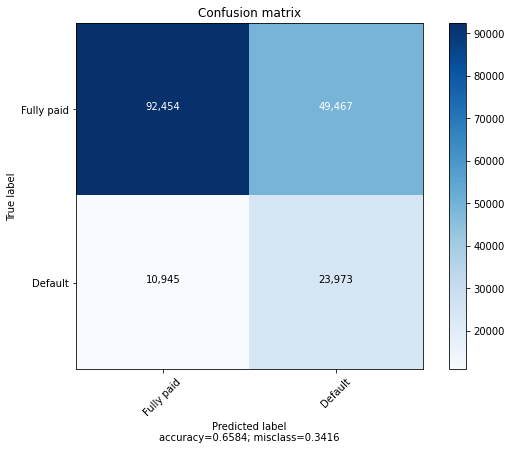

In [41]:
pd.options.mode.chained_assignment = None  # default='warn'
pd.options.display.max_rows = 200
pd.options.display.max_columns = 150
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    import matplotlib.pyplot as plt
    import itertools

    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm2 = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm2[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.savefig('confusion matrix results.png', bbox_inches = "tight",dpi=300)
    plt.show()
citation: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
import matplotlib.pyplot as plt
plot_confusion_matrix(np.array([[92454, 49467], [10945, 23973]]),['Fully paid', 'Default'],
                          title='Confusion matrix',
                          cmap=None,normalize=False)


In [114]:
from sklearn.metrics import roc_curve,auc
fpr_nn_rus, tpr_nn_rus, thresholds_nn = roc_curve(y_test, yhat_probs_nn_rus)
auc_nn_rus = auc(fpr_nn_rus, tpr_nn_rus)
fpr_nn_ros, tpr_nn_ros, thresholds_nn = roc_curve(y_test, yhat_probs_nn_ros)
auc_nn_ros = auc(fpr_nn_ros, tpr_nn_ros)
fpr_nn_iht, tpr_nn_iht, thresholds_nn = roc_curve(y_test, yhat_probs_nn_iht)
auc_nn_iht = auc(fpr_nn_iht, tpr_nn_iht)
fpr_nn_smote, tpr_nn_smote, thresholds_nn = roc_curve(y_test, yhat_probs_nn_smote)
auc_nn_smote = auc(fpr_nn_smote, tpr_nn_smote)

fpr_rf_rus, tpr_rf_rus, thresholds_rf = roc_curve(y_test, yhat_probs_for_rus)
auc_rf_rus = auc(fpr_rf_rus, tpr_rf_rus)
fpr_rf_iht, tpr_rf_iht, thresholds_rf = roc_curve(y_test, yhat_probs_for_iht)
auc_rf_iht = auc(fpr_rf_iht, tpr_rf_iht)
fpr_rf_smote, tpr_rf_smote, thresholds_rf = roc_curve(y_test, yhat_probs_for_smote)
auc_rf_smote = auc(fpr_rf_smote, tpr_rf_smote)
fpr_rf_ros, tpr_rf_ros, thresholds_rf = roc_curve(y_test, yhat_probs_for_ros)
auc_rf_ros = auc(fpr_rf_ros, tpr_rf_ros)

fpr_log_rus, tpr_log_rus, thresholds_log = roc_curve(y_test, yhat_probs_log_rus)
auc_log_rus = auc(fpr_log_rus, tpr_log_rus)
fpr_log_iht, tpr_log_iht, thresholds_log = roc_curve(y_test, yhat_probs_log_iht)
auc_log_iht = auc(fpr_log_iht, tpr_log_iht)
fpr_log_smote, tpr_log_smote, thresholds_log = roc_curve(y_test, yhat_probs_log_smote)
auc_log_smote = auc(fpr_log_smote, tpr_log_smote)
fpr_log_ros, tpr_log_ros, thresholds_log = roc_curve(y_test, yhat_probs_log_ros)
auc_log_ros = auc(fpr_log_ros, tpr_log_ros)


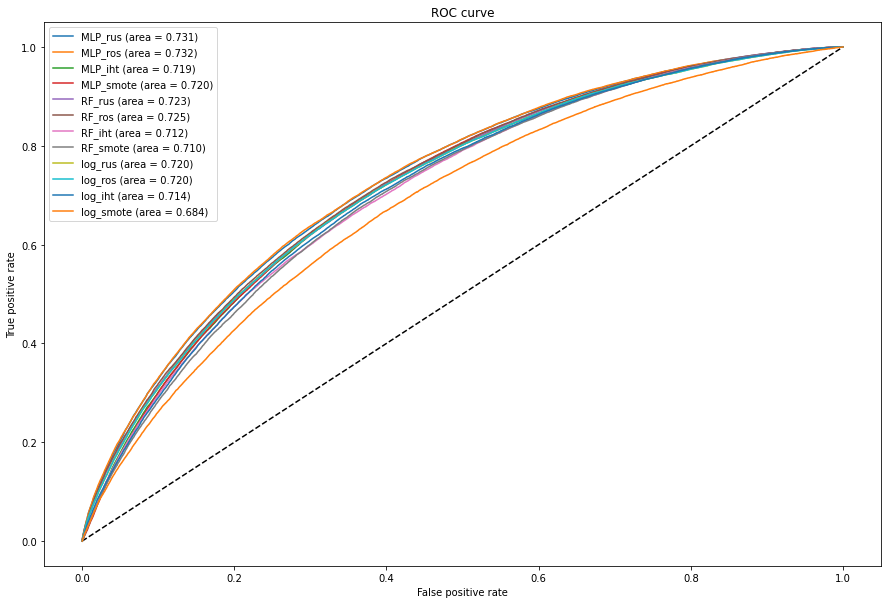

In [125]:
plt.figure(1,figsize=[15,10])
#plt.xlim(0.2, 0.5)
#plt.ylim(0.5, .8)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_nn_rus, tpr_nn_rus, label='MLP_rus (area = {:.3f})'.format(auc_nn_rus))
plt.plot(fpr_nn_ros, tpr_nn_ros, label='MLP_ros (area = {:.3f})'.format(auc_nn_ros))
plt.plot(fpr_nn_iht, tpr_nn_iht, label='MLP_iht (area = {:.3f})'.format(auc_nn_iht))
plt.plot(fpr_nn_smote, tpr_nn_smote, label='MLP_smote (area = {:.3f})'.format(auc_nn_smote))

plt.plot(fpr_rf_rus, tpr_rf_rus, label='RF_rus (area = {:.3f})'.format(auc_rf_rus))
plt.plot(fpr_rf_ros, tpr_rf_ros, label='RF_ros (area = {:.3f})'.format(auc_rf_ros))
plt.plot(fpr_rf_iht, tpr_rf_iht, label='RF_iht (area = {:.3f})'.format(auc_rf_iht))
plt.plot(fpr_rf_smote, tpr_rf_smote, label='RF_smote (area = {:.3f})'.format(auc_rf_smote))

plt.plot(fpr_log_rus, tpr_log_rus, label='log_rus (area = {:.3f})'.format(auc_log_rus))
plt.plot(fpr_log_ros, tpr_log_ros, label='log_ros (area = {:.3f})'.format(auc_log_ros))
plt.plot(fpr_log_iht, tpr_log_iht, label='log_iht (area = {:.3f})'.format(auc_log_iht))
plt.plot(fpr_log_smote, tpr_log_smote, label='log_smote (area = {:.3f})'.format(auc_log_smote))

#plt.plot(fpr_rfc, tpr_rfc, label='RFC (area = {:.3f})'.format(auc_rfc))
#plt.plot(fpr_log, tpr_log, label='LR (area = {:.3f})'.format(auc_log))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

Text(0.5, 1.0, 'Figure 3: SHAP values features')

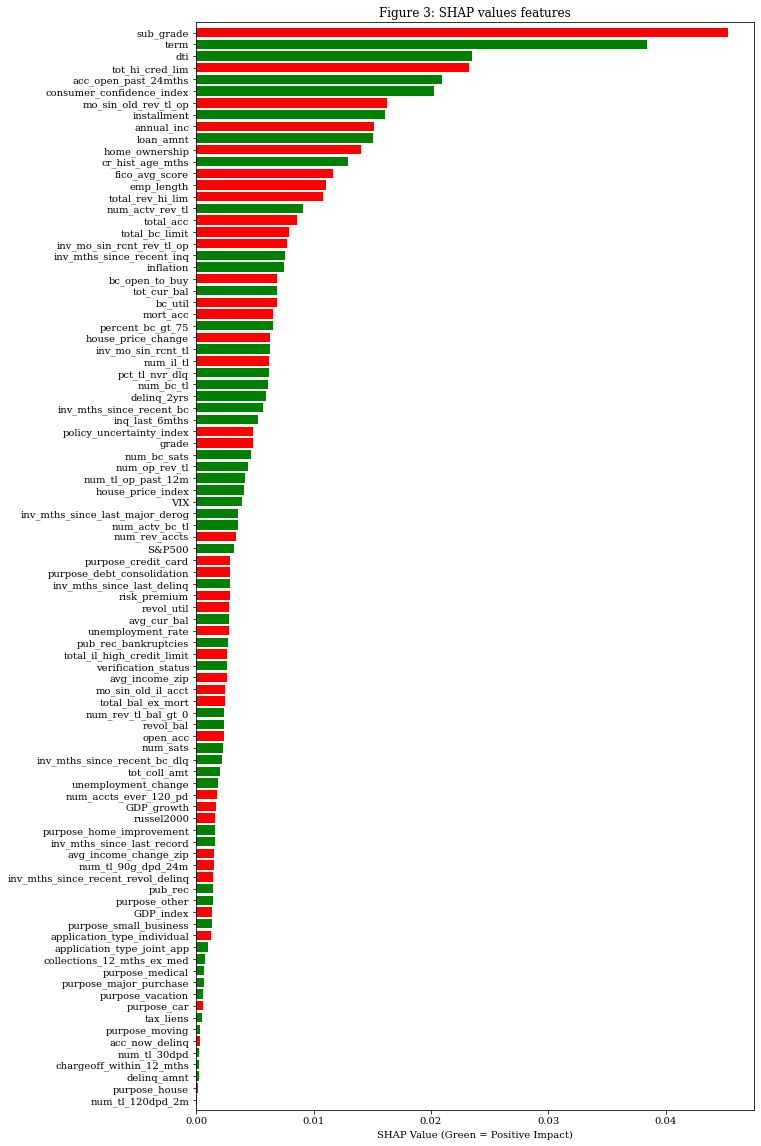

In [423]:
import shap
import matplotlib.pyplot as plt
explainer = shap.DeepExplainer(model_ros,X_test_scaled_ros[:3000])
shap_values = explainer.shap_values(X_test_scaled_ros[:3000])
#import matplotlib as plt
# Make a copy of the input data
shap_v = pd.DataFrame(shap_values[0])
feature_list = pd.DataFrame(X_test_scaled_ros[:3000],columns=X_var_renamed).columns
shap_v.columns = feature_list
df_v = pd.DataFrame(X_test_scaled_ros[:3000],columns=X_var_renamed).copy().reset_index().drop('index',axis=1)
    
# Determine the correlation in order to plot with different colors
corr_list = list()
for i in feature_list:
    b = np.corrcoef(shap_v[i],df_v[i])[1][0]
    corr_list.append(b)
corr_df = pd.concat([pd.Series(feature_list),pd.Series(corr_list)],axis=1).fillna(0)
# Make a data frame. Column 1 is the feature, and Column 2 is the correlation coefficient
corr_df.columns  = ['Variable','Corr']
corr_df['Sign'] = np.where(corr_df['Corr']>0,'green','red')
    
# Plot it
shap_abs = np.abs(shap_v)
k=pd.DataFrame(shap_abs.mean()).reset_index()
k.columns = ['Variable','SHAP_abs']
k2 = k.merge(corr_df,left_on = 'Variable',right_on='Variable',how='inner')
k2 = k2.sort_values(by='SHAP_abs',ascending = True)
colorlist = k2['Sign']
fig, ax = plt.subplots(figsize=(10,20)) 
plt.barh(k2['Variable'],k2['SHAP_abs'],color=k2['Sign'])
plt.margins(0.05, 0.005)
ax.set_xlabel("SHAP Value (Green = Positive Impact)")
ax.set_title('Figure 3: SHAP values features')
#plt.savefig('feature barplot.png', bbox_inches = "tight",dpi=300)

# Boxplot

In [424]:
cvscores1= pd.read_excel('cvscores1.xlsx').iloc[:,1]

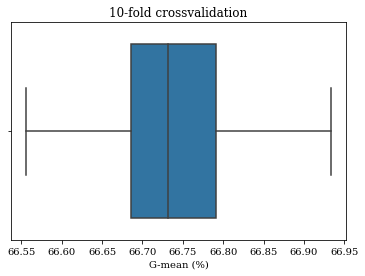

In [427]:
import seaborn as sns
import matplotlib.pyplot as plt
fig = sns.boxplot(x=cvscores1)
plt.xlabel('G-mean (%)')
plt.title('10-fold crossvalidation')
plt.savefig('10fold cross.png', bbox_inches = "tight",dpi=300)
plt.show()


In [138]:
print('mean: ',np.mean(cvscores1))
print('std: ',np.std(cvscores1))
#print('95% confidense interval',cvscore.mean()-1.96*cvscore.std(),cvscore.mean()+1.96*cvscore.std() )


mean:  66.74491873103251
std:  0.10267468526135458


In [82]:
from platform import python_version

print(python_version())

3.7.4
